In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import louvain_communities
from collections import Counter

In [2]:
file_path = 'email-Eu-core.txt'

# Initialize an empty directed graph
G = nx.DiGraph()

with open(file_path, 'r') as file:
    for line in file:
        # Skip comments and empty lines
        if line.startswith('#') or not line.strip():
            continue

        # Build graph
        source, target = line.strip().split()[:2]
        G.add_edge(source, target)

print(f"Loaded graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Loaded graph with 1005 nodes and 25571 edges.


In [3]:
# Basic properties
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is the graph directed: {G.is_directed()}")

Number of nodes: 1005
Number of edges: 25571
Is the graph directed: True


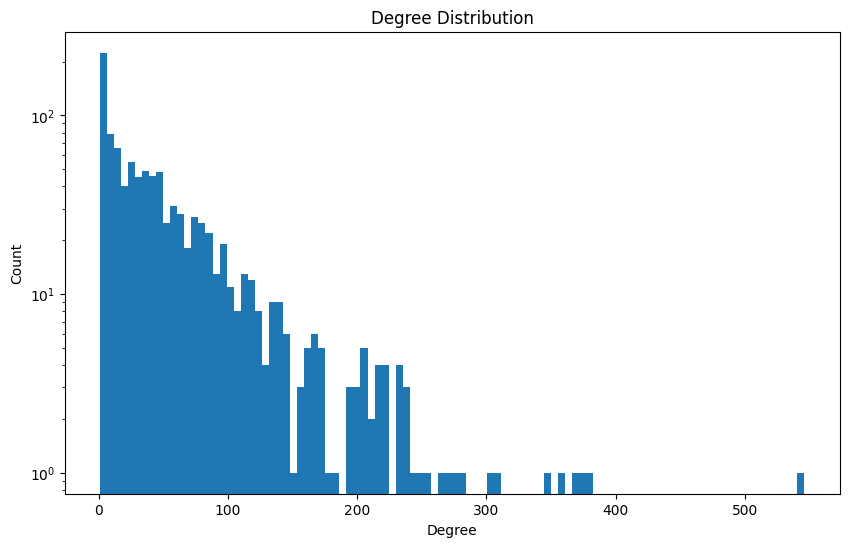

In [4]:
degrees = [G.degree(n) for n in G.nodes()]

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=100, log=True)
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

In [5]:
# Strongly connected components
strongly_connected_components = nx.strongly_connected_components(G)
largest_scc = max(strongly_connected_components, key=len)
print(f"Number of nodes in the largest strongly connected component: {len(largest_scc)}")

# Weakly connected components
weakly_connected_components = nx.weakly_connected_components(G)
largest_wcc = max(weakly_connected_components, key=len)
print(f"Number of nodes in the largest weakly connected component: {len(largest_wcc)}")

Number of nodes in the largest strongly connected component: 803
Number of nodes in the largest weakly connected component: 986


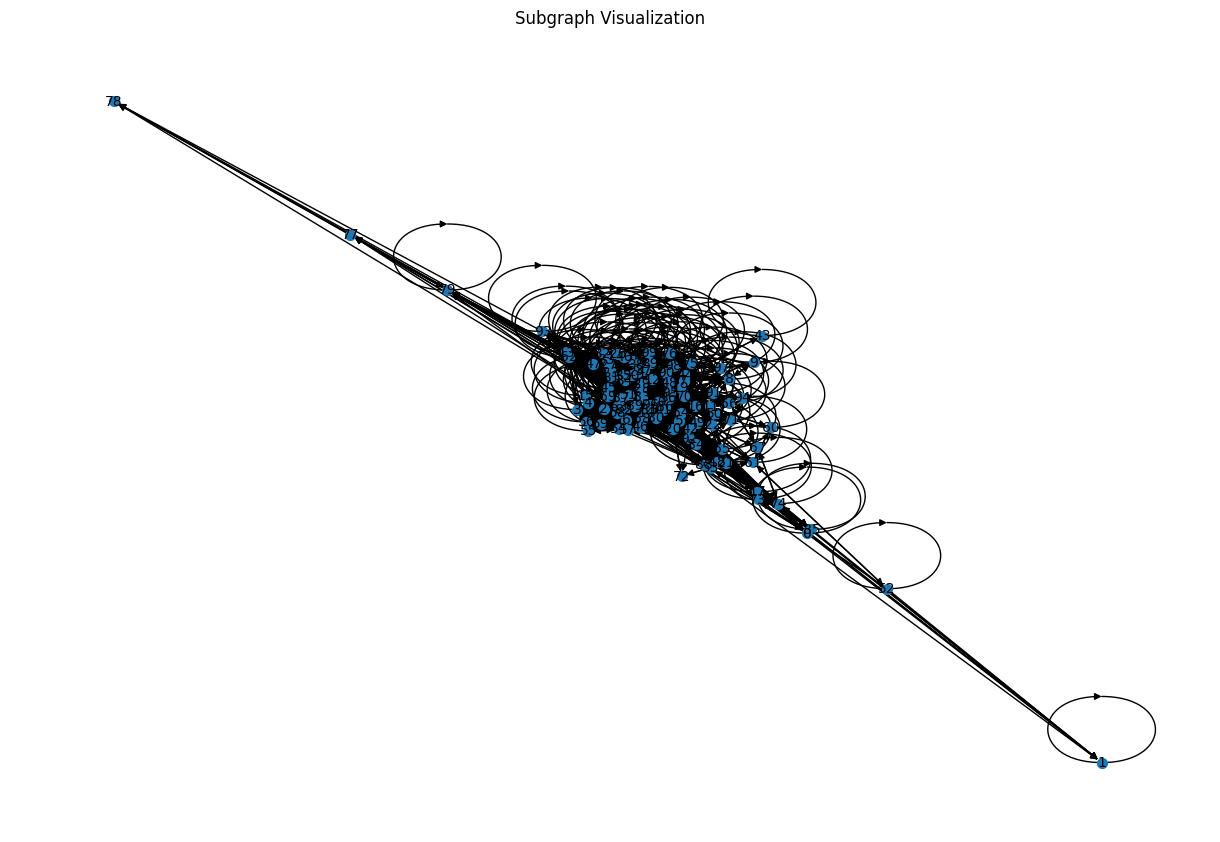

In [6]:

# Visualize a subgraph of the first 100 nodes
subgraph_nodes = list(G.nodes())[:100]
H = G.subgraph(subgraph_nodes)

plt.figure(figsize=(12, 8))
nx.draw(H, with_labels=True, node_size=50, font_size=10)
plt.title("Subgraph Visualization")
plt.show()

In [7]:
# Convert to undirected graph for Louvain method
G_undirected = G.to_undirected()

# Run Louvain community detection
#louvain_communities(G, weight='weight', resolution=1, threshold=1e-07, seed=None)
#  PARAMETERS
#    G - NetworkX graph
#    weight -string or None, optional (default=”weight”) The name of an edge attribute that holds the numerical value used as a weight. If None then each edge has weight 1.
#    resolution - float, optional (default=1) If resolution is less than 1, the algorithm favors larger communities. Greater than 1 favors smaller communities
#    threshold - float, optional (default=0.0000001) Modularity gain threshold for each level. If the gain of modularity between 2 levels of the algorithm is less than the given threshold then the algorithm stops and returns the resulting communities.
#    seed - integer, random_state, or None (default) Indicator of random number generation state. See Randomness.

communities = louvain_communities(G_undirected, resolution=1, threshold=1e-07)
#Returns:list - A list of sets (partition of G). Each set represents one community and contains all the nodes that constitute it.

communities_sizes = []
# Display the communities
for i, community in enumerate(communities):
    communities_sizes.append(len(community))
    print(f"Community {i}: Size {len(community)}")
    # Print some nodes of the community
    print(f"Nodes: {list(community)[:5]}")  # Show first 5 nodes as an example

Community 0: Size 181
Nodes: ['483', '222', '397', '1', '311']
Community 1: Size 166
Nodes: ['492', '497', '643', '518', '701']
Community 2: Size 91
Nodes: ['293', '566', '247', '973', '856']
Community 3: Size 10
Nodes: ['134', '482', '521', '766', '553']
Community 4: Size 1
Nodes: ['580']
Community 5: Size 60
Nodes: ['644', '640', '185', '676', '735']
Community 6: Size 1
Nodes: ['633']
Community 7: Size 1
Nodes: ['648']
Community 8: Size 1
Nodes: ['653']
Community 9: Size 1
Nodes: ['658']
Community 10: Size 1
Nodes: ['660']
Community 11: Size 1
Nodes: ['670']
Community 12: Size 1
Nodes: ['675']
Community 13: Size 1
Nodes: ['684']
Community 14: Size 1
Nodes: ['691']
Community 15: Size 1
Nodes: ['703']
Community 16: Size 1
Nodes: ['711']
Community 17: Size 1
Nodes: ['731']
Community 18: Size 1
Nodes: ['732']
Community 19: Size 1
Nodes: ['744']
Community 20: Size 1
Nodes: ['746']
Community 21: Size 1
Nodes: ['772']
Community 22: Size 1
Nodes: ['798']
Community 23: Size 1
Nodes: ['808']
C